In [1]:
!python --version

Python 3.13.8


In [3]:
import json

with open('week4.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

list(data.keys())

['Nvidia', 'AMD', 'Intel']

In [4]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

In [5]:
from google import genai
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY", "")
client = genai.Client(api_key=GEMINI_API_KEY)

In [6]:
summary7day_prompt = """
You are an analyst specializing in the semiconductor industry. 

TASK:
Summarize risks and opportunities for **{chipmaker}** over the last 7 days based on extracted knowledge triplets.

INPUT FORMAT:
Each triplet has:
- subject
- relation (verb + optional detail)
- object

Triplets (past 7 days):
{triplets}

INSTRUCTIONS:
1. Carefully analyze the triplets to identify signals of **risks** (e.g., export restrictions, regulatory scrutiny, market struggles, competition, delays).
2. Identify **opportunities** (e.g., new product launches, strong demand, partnerships, positive analyst ratings, technological advances).
3. For each risk or opportunity, **cite the supporting triplet** in this format:
   subject -(verb[/detail])-> object
   Example: China -(scrutinizes)-> Nvidia
4. Organize into two sections:
   - **Risks for {chipmaker}**
   - **Opportunities for {chipmaker}**
5. At the end, write a **short summary outlook** combining both risks and opportunities.

OUTPUT FORMAT:
Risks for {chipmaker}:
- [triplet] → explanation
- ...

Opportunities for {chipmaker}:
- [triplet] → explanation
- ...

Outlook:
<short paragraph>
"""

In [7]:
chipmaker = "Nvidia"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of risks and opportunities for Nvidia over the last 7 days based on the provided knowledge triplets:

### Risks for Nvidia:

*   `OpenAI -(depends/for GPUs)-> Nvidia` → High customer concentration risk; if a major customer like OpenAI faces setbacks, it could impact Nvidia's revenue significantly.
*   `Nvidia -(slips/1.1%)-> stock` → Short-term negative stock price movement, reflecting market volatility or investor concerns.
*   `Nvidia -(takes/for China datacenter products)-> write-down` → Financial loss due to challenges or write-downs related to its China data center market products.
*   `Bazzite -(has/with Nvidia GPUs)-> issues` → Reports of compatibility or performance issues with Nvidia GPUs could damage reputation or hinder broader software adoption.
*   `Huang -(sells/75,000 of Nvidia)-> shares` → Significant insider selling, including by CEO Jensen Huang and other executives (e.g., Mark Stevens, Jen Hsu

In [8]:
chipmaker = "AMD"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of AMD's risks and opportunities over the last 7 days based on the provided knowledge triplets:

### Risks for AMD:

-   **AMD -(grant/to OpenAI, 160M shares)-> warrant** → The granting of 160 million shares in warrants to OpenAI represents a potential future share dilution, which could impact existing shareholder value.
-   **AMD -(negotiate/production with TSMC)-> output** → Ongoing negotiations with TSMC for production output suggest potential supply chain constraints or challenges in securing adequate manufacturing capacity, critical for meeting rising demand, especially for AI chips.
-   **AMD -(ship/not yet)-> MI450** and **AMD -(announce/not yet)-> MI450** → The delayed shipment and announcement of the MI450, a potential next-generation GPU, indicate a lag in bringing key products to market, which could affect its competitive position in the rapidly evolving AI hardware space.
-   **AMD -(rival)-> Nvidia*

In [9]:
chipmaker = "Intel"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

Here's an analysis of Intel's risks and opportunities over the last 7 days:

### Risks for Intel:

*   **Competitive Performance Gaps:**
    *   `BE201 -(is outperformed/in Wi-Fi 6E conditions)-> RealTek` → Intel's new BE201 Wi-Fi product is being outperformed by a competitor in specific conditions, indicating a potential weakness in connectivity offerings.
*   **Stock Price & Analyst Sentiment:**
    *   `Intel -(decreases/by 1.3%)-> Stock` → Intel's stock experienced a decline.
    *   `Intel -(trades/in red on Sept 30, 2025)-> red` → The stock traded negatively, signaling investor concern.
    *   `DeutscheBank -(targets/$30.00)-> Intel` → DeutscheBank set a price target significantly below the recent closing price, suggesting a bearish outlook.
    *   `Stifel -(targets/$24.50)-> Intel` → Stifel's price target is notably low, indicating significant downside risk in their view.
*   **Strategic & Operational Challenges:**
    *   `Intel -(reduces)-> R&D` → A reduction in R&D spend co

In [10]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

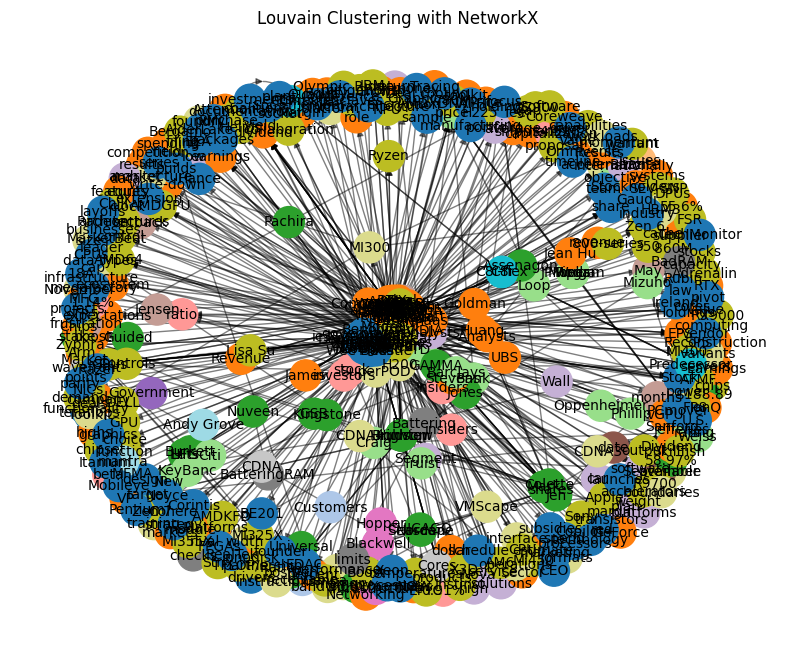

In [11]:
import matplotlib.pyplot as plt

communities = nx.community.louvain_communities(G, seed=123)

community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

pos = nx.spring_layout(G, seed=42)
node_colors = [community_map[n] for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Louvain Clustering with NetworkX")
plt.axis("off")
plt.show()